In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('C:\\Users\\pc\\Desktop\\Handwritten-digit-classification\\data\\raw\\digits.csv',index_col=0)

In [5]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
df.isnull().sum()

pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
target      0
Length: 65, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel_0   1797 non-null   float64
 1   pixel_1   1797 non-null   float64
 2   pixel_2   1797 non-null   float64
 3   pixel_3   1797 non-null   float64
 4   pixel_4   1797 non-null   float64
 5   pixel_5   1797 non-null   float64
 6   pixel_6   1797 non-null   float64
 7   pixel_7   1797 non-null   float64
 8   pixel_8   1797 non-null   float64
 9   pixel_9   1797 non-null   float64
 10  pixel_10  1797 non-null   float64
 11  pixel_11  1797 non-null   float64
 12  pixel_12  1797 non-null   float64
 13  pixel_13  1797 non-null   float64
 14  pixel_14  1797 non-null   float64
 15  pixel_15  1797 non-null   float64
 16  pixel_16  1797 non-null   float64
 17  pixel_17  1797 non-null   float64
 18  pixel_18  1797 non-null   float64
 19  pixel_19  1797 non-null   float64
 20  pixel_20  1797 non-null   float64
 

In [8]:
X=df.drop('target' , axis=1)
y=df['target']

In [9]:
X = X.values
y = y.values


In [24]:
#X = df.images.reshape((len(df.images), -1))  # shape (1797, 64)

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(X,y ,test_size=0.3 ,random_state=40)

In [11]:
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
X_test

array([[ 0.        , -0.33684252, -0.49267747, ..., -0.63455424,
        -0.50237708, -0.20052256],
       [ 0.        , -0.33684252, -0.91933651, ...,  0.38936704,
        -0.50237708, -0.20052256],
       [ 0.        , -0.33684252, -0.70600699, ..., -0.46390069,
        -0.50237708, -0.20052256],
       ...,
       [ 0.        , -0.33684252, -0.49267747, ..., -1.14651489,
        -0.50237708, -0.20052256],
       [ 0.        , -0.33684252, -1.13266602, ...,  1.41328833,
         0.47327065, -0.20052256],
       [ 0.        , -0.33684252,  1.21395865, ..., -0.29324715,
         2.66847805,  3.13062539]])

In [13]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

train_acc = svm_linear.score(X_train, y_train)
test_acc = svm_linear.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Train Accuracy: 1.0
Test Accuracy: 0.9777777777777777


In [14]:
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf.fit(X_train, y_train)

print("RBF Train Accuracy:", svm_rbf.score(X_train, y_train))
print("RBF Test Accuracy:", svm_rbf.score(X_test, y_test))


RBF Train Accuracy: 1.0
RBF Test Accuracy: 0.9796296296296296


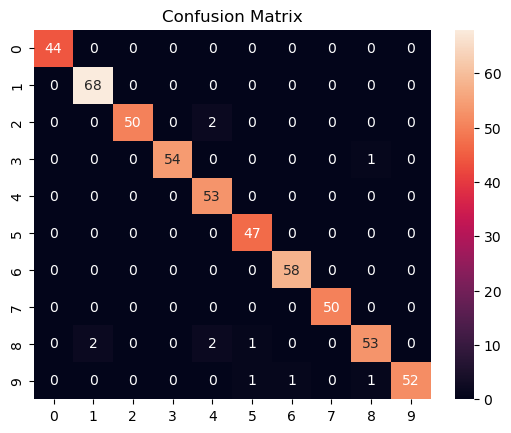

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = svm_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix")
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.9777240245367735


In [17]:
import numpy as np

misclassified = np.where(y_test != y_pred)[0]

print("Number of misclassified samples:", len(misclassified))


Number of misclassified samples: 11


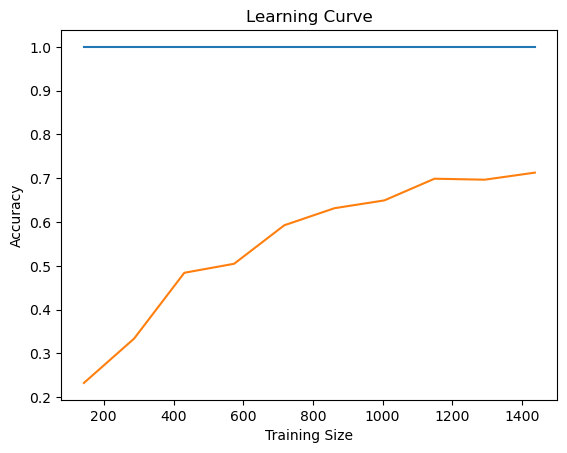

In [18]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    svm_rbf, 
    X, 
    y, 
    cv=5, 
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean)
plt.plot(train_sizes, test_mean)

plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.show()



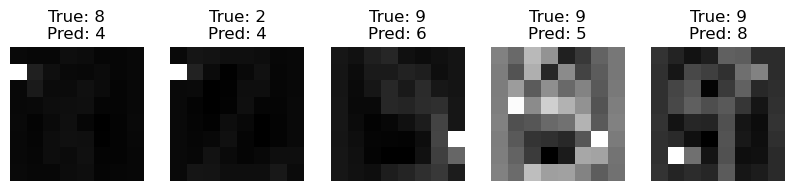

In [19]:
import matplotlib.pyplot as plt
import numpy as np

misclassified = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10,4))

for i, index in enumerate(misclassified[:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[index].reshape(8,8), cmap='gray')
    plt.title(f"True: {y_test[index]}\nPred: {y_pred[index]}")
    plt.axis('off')

plt.show()



In [20]:
import joblib

joblib.dump(grid.best_estimator_, "svm_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

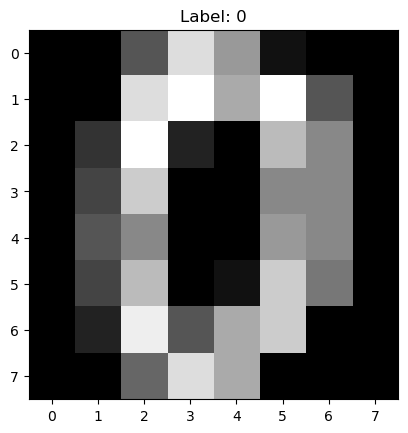

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.images[0], cmap='gray')
plt.title(f"Label: {digits.target[0]}")
plt.show()
print(digits.images[0])  # shows the raw pixel values

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
X_test = digits.images[0].flatten().reshape(1, -1)  # known digit "0"
X_scaled = scaler.transform(X_test)
print("Prediction on known 0:", grid.best_estimator_.predict(X_scaled))

Prediction on known 0: [0]
